<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [40]:
student_number = '401105901'
full_name = 'Amirardalan Dehghanpour'
assert student_number and full_name is not None, 'please input your information'

In [41]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [51]:
# todo
data=pd.read_csv('dataset.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Display dataset information.

In [52]:
# todo
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer: CUST_ID is most irrelevant for PCA and clustering and we can't get much information with this column.

In [53]:
# Exclude irrelevant feature
data = data.drop(columns=['CUST_ID'])
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


how do you handle missing data, and why did you choose this method?
<br>
Answer: I used mean filling method and i thought this method is useful in this dataset beacuse density of missing datas was small among all rows


In [54]:
#Fill missing data
print("Missing values before filling:\n", data.isnull().sum())

# Fill NaN values in specific columns with the column mean
data.fillna({'CREDIT_LIMIT': data['CREDIT_LIMIT'].mean(), 
             'MINIMUM_PAYMENTS': data['MINIMUM_PAYMENTS'].mean()}, inplace=True)

# Check the count of missing values after filling
print("Missing values after filling:\n", data.isnull().sum())
#df.isnull().sum()

Missing values before filling:
 BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Missing values after filling:
 BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUE

plot the correlation matrix and identify redundant features.remove them from the dataframe.

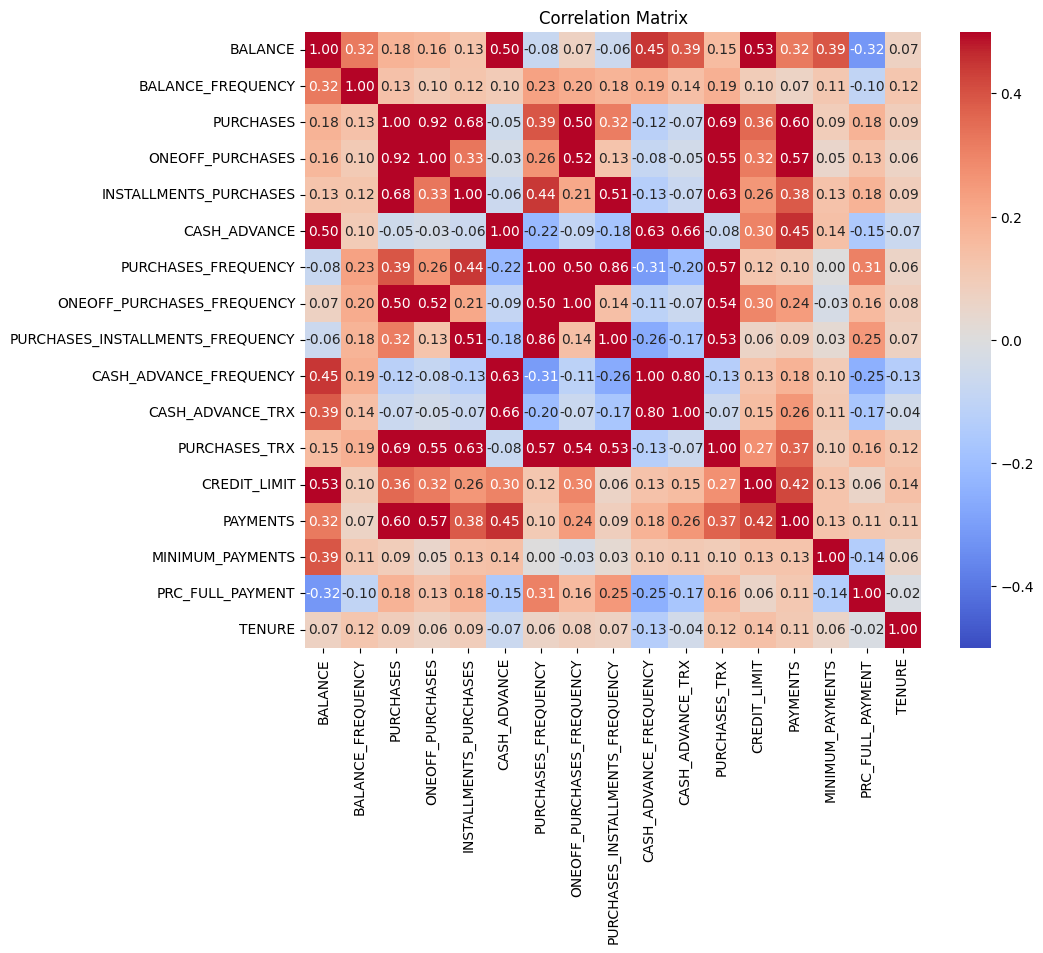

In [55]:
# Plot the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5, square=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [56]:
# Identify and remove redundant features. use 0.8 threshold.
correlation_matrix = data.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)
]

df_reduced = data.drop(columns=to_drop)

print("Dropped columns:", to_drop)
print("New DataFrame shape:", df_reduced.shape)

Dropped columns: ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']
New DataFrame shape: (8950, 15)


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [57]:
# todo
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

Why is it important to standardize the data before applying PCA?
<br>
Answer: Beacuse we want use some methods such as lagrange multiplier and another methods in which we assume that $E[X] ^ 2$=0 and get results with respect to this.

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer:Normalizer is : $\frac{X}{||X||}$ but StandardScaler is $\frac{X-mean(X)}{std(X)}$.Standard Scaler is better for PCA beacuse Normalizer scales each sample individually rather than the features across samples, which does not align with PCA's goal of finding principal components across features..

## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [58]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        if self.n_components is None:
            self.n_components = X.shape[1]

        self.components = eigenvectors[:, :self.n_components]
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio = eigenvalues[:self.n_components] / total_variance


    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components

### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer:6

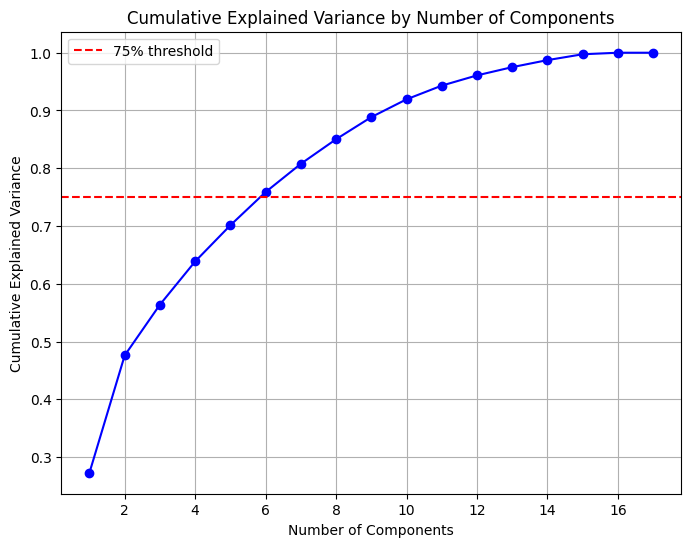

Number of components needed to explain 75% of the variance: 6


In [59]:
# todo
import matplotlib.pyplot as plt
import numpy as np

pca=CustomPCA()
pca.fit(df_normalized.to_numpy())
explained_variance_ratio = pca.get_explained_variance_ratio()
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.axhline(y=0.75, color='r', linestyle='--', label='75% threshold')
plt.legend(loc='best')
plt.show()

# Find the number of components needed to reach 75% variance
num_components_75 = np.argmax(cumulative_explained_variance >= 0.75) + 1
print(f"Number of components needed to explain 75% of the variance: {num_components_75}")


Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [60]:
#Build a new DataFrame with the first slected components
X_transformed = pca.transform(df_normalized)[:, :num_components_75]
columns = [f"PC{i+1}" for i in range(num_components_75)]
df_pca = pd.DataFrame(X_transformed, columns=columns)

# Display the resulting DataFrame
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6
0  1.682220  1.076451  0.488507  0.665552 -0.018225  0.050629
1  1.138295 -2.506477  0.601212 -0.120437 -0.605803 -1.136841
2 -0.969684  0.383520  0.102371  1.209266  2.172584 -0.217222
3  0.873628 -0.043166  1.460167  1.151980 -0.295632 -0.123689
4  1.599434  0.688581  0.365094  0.990232  0.487039  0.075060


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

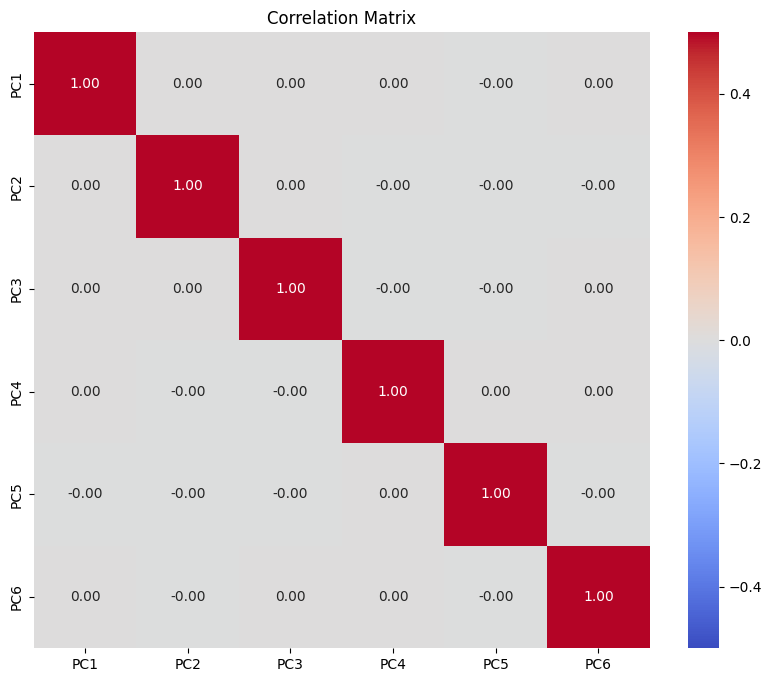

In [61]:
# todo
correlation_pca_matrix = df_pca.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pca_matrix, annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5, square=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## KMeans (45 points)
Implement kmeans from scratch.

In [108]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]       
        for i in range(0,self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels_ = np.argmin(distances, axis=1)
            new_centers = np.array([X[self.labels_ == j].mean(axis=0) for j in range(self.n_clusters)])
            if np.all(self.centroids == new_centers):
             print(f"Converged at iteration {i}")
             break
            self.centroids = new_centers
        self.inertia_ = self._calculate_inertia(X)

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        # Step 1: For each cluster, compute the squared distances of points from their corresponding centroid
        # Step 2: Sum all squared distances to compute inertia
        inertia = 0.0
    # For each cluster, compute the squared distances and sum them        inertia = 0
        for i in range(self.n_clusters):
            cluster_points = X[self.labels_ == i]
            centroid = self.centroids[i]
            inertia += np.sum((cluster_points - centroid) ** 2)
        return inertia

### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters?

In [109]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []

# Apply KMeans for a range of cluster values (from 1 to 30)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 42
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)
    kmeans_pca.fit(X_transformed)
    # Fit the model to the PCA-transformed data
    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca._calculate_inertia(X_transformed))

Converged at iteration 1
Converged at iteration 14
Converged at iteration 36
Converged at iteration 56
Converged at iteration 20
Converged at iteration 21
Converged at iteration 27
Converged at iteration 48
Converged at iteration 28
Converged at iteration 52
Converged at iteration 37
Converged at iteration 27
Converged at iteration 66
Converged at iteration 45
Converged at iteration 71
Converged at iteration 51
Converged at iteration 54
Converged at iteration 73
Converged at iteration 51
Converged at iteration 64
Converged at iteration 58
Converged at iteration 63
Converged at iteration 49
Converged at iteration 62
Converged at iteration 99
Converged at iteration 84
Converged at iteration 42
Converged at iteration 87
Converged at iteration 85


[115446.83472186467, 91307.80640229386, 75666.56591004683, 63176.15182905882, 56740.67584368469, 54635.16977907579, 48412.70856166734, 46310.204945452, 41463.19570500266, 40382.31513514757, 36769.537476546146, 34289.51816748018, 32659.836314068303, 32740.176908315396, 30155.963847880616, 29376.79907526375, 28764.87663077731, 28270.015651845115, 27062.283387557283, 27129.484870303302, 26338.603986112223, 25773.952338619834, 24984.518640015223, 24207.339803369607, 23998.44388310155, 22937.850693799213, 23312.433776093883, 22640.18469124028, 22171.86324320086]


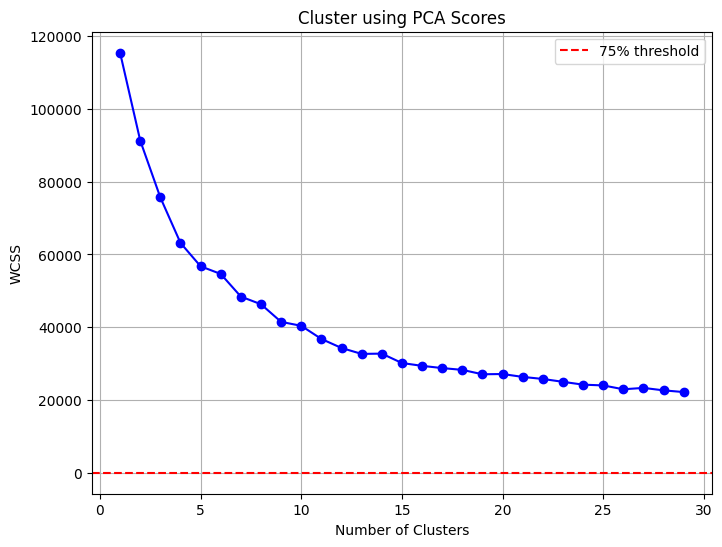

In [120]:
# Plot the Elbow curve using Matplotlib
print(WCSS)
plt.figure(figsize=(8, 6))
plt.plot(range(1,30),WCSS, marker='o', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Cluster using PCA Scores')
plt.grid(True)
plt.axhline(y=0.75, color='r', linestyle='--', label='75% threshold')
plt.legend(loc='best')
plt.show()

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [121]:
# Apply KMeans on PCA-reduced data with the optimal number of clusters based on the elbow method
optimal_pca = CustomKMeans(n_clusters=5, random_state=42)
optimal_pca.fit(df_pca.to_numpy())

Converged at iteration 30


In [123]:
# Add a new column 'segment' to pca data frame and assign the cluster labels to each observation
df_pca['segment']=optimal_pca.labels_


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

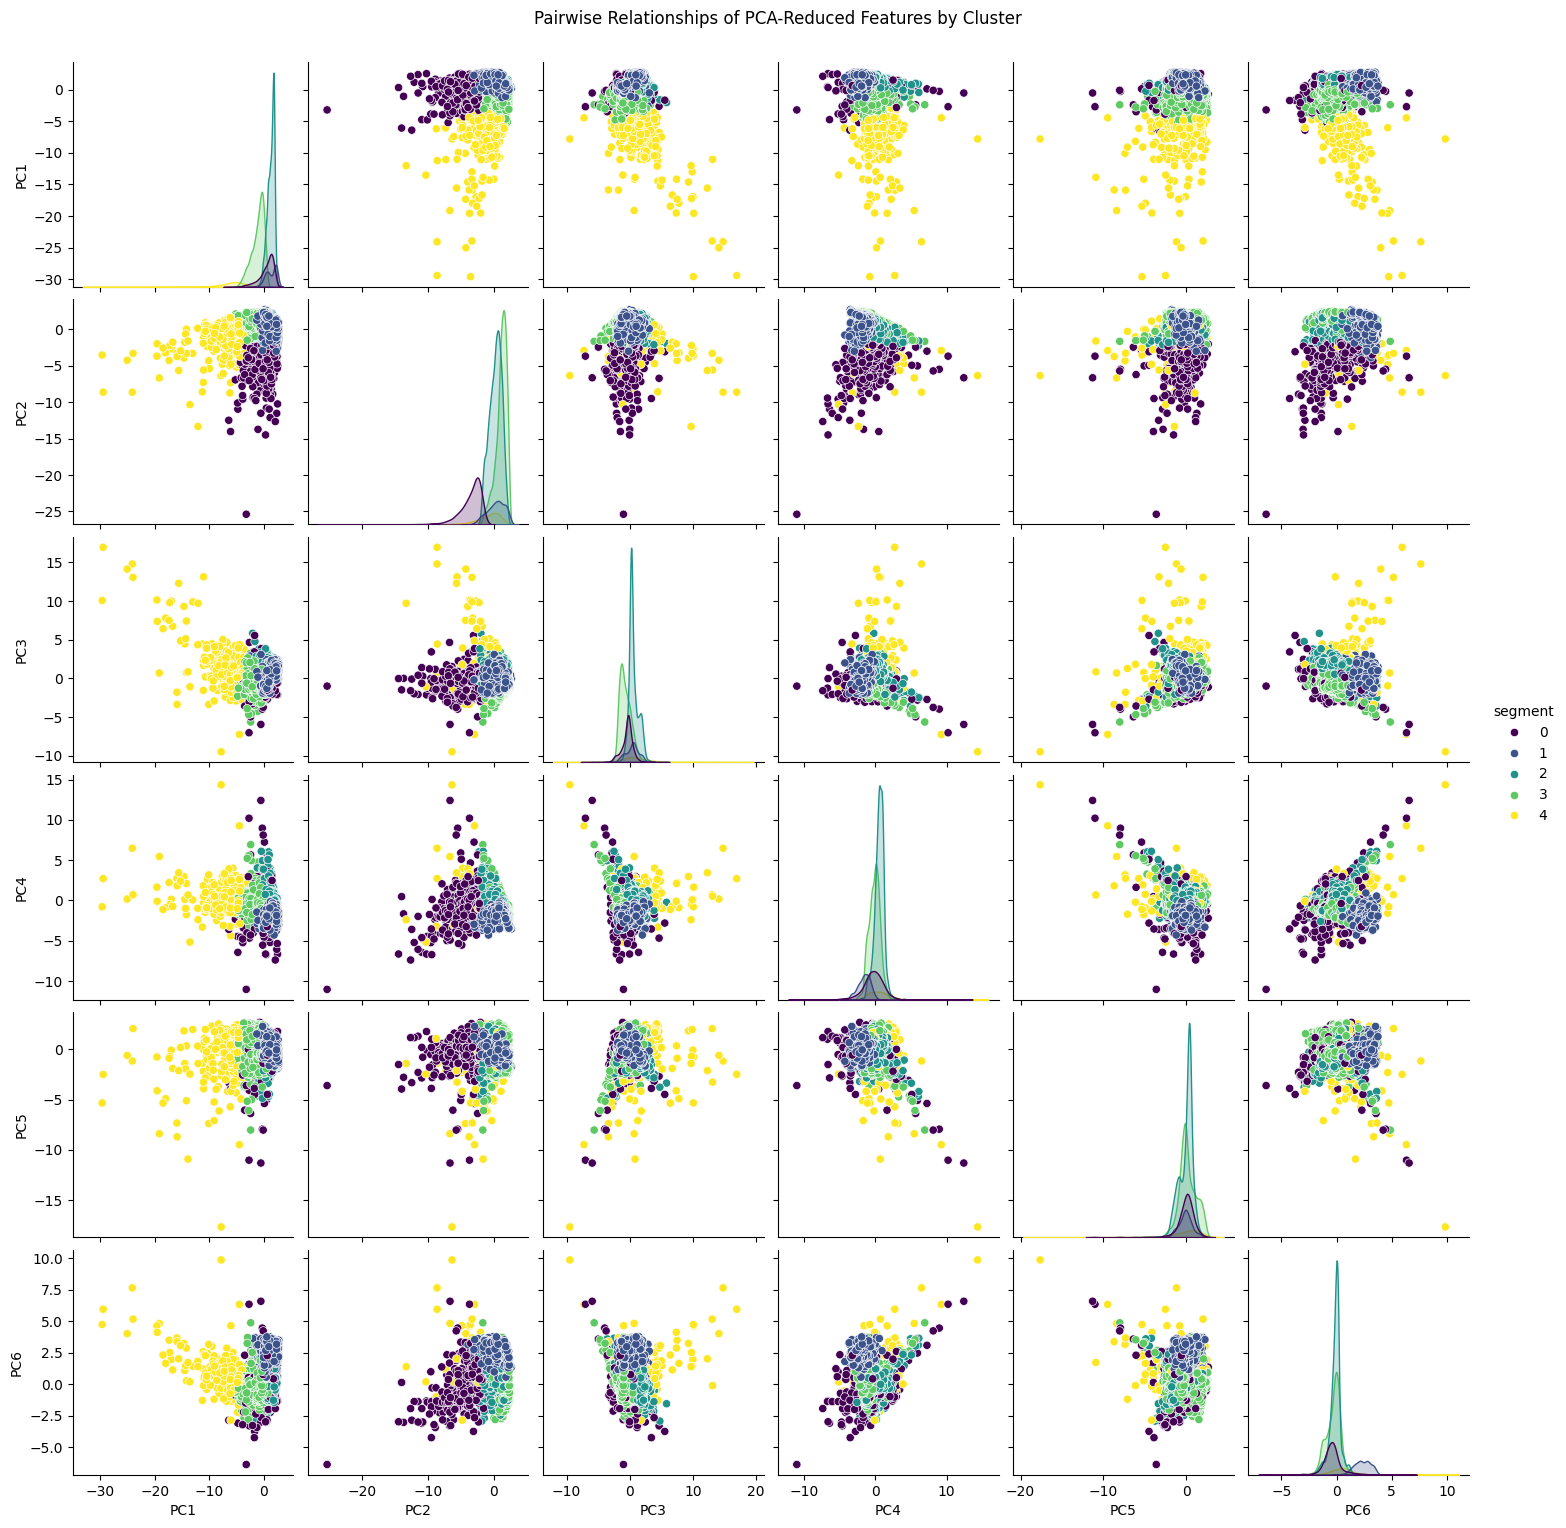

In [124]:
# todo
sns.pairplot(df_pca, hue='segment', palette='viridis', diag_kind='kde')
plt.suptitle("Pairwise Relationships of PCA-Reduced Features by Cluster", y=1.02)
plt.show()

So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


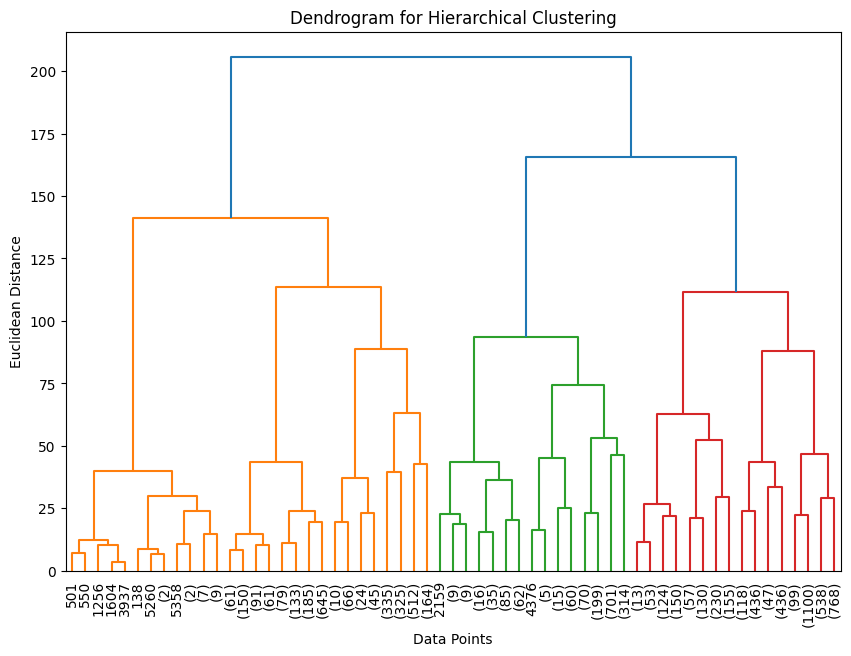

In [125]:
import scipy.cluster.hierarchy as sch
# Perform Hierarchical Clustering on the pca dataset

# Visualize the dendrogram
pca_data = df_pca.drop(columns=['segment'], errors='ignore')

# Perform hierarchical clustering
linkage_matrix = sch.linkage(pca_data, method='ward')  # Using Ward's method

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

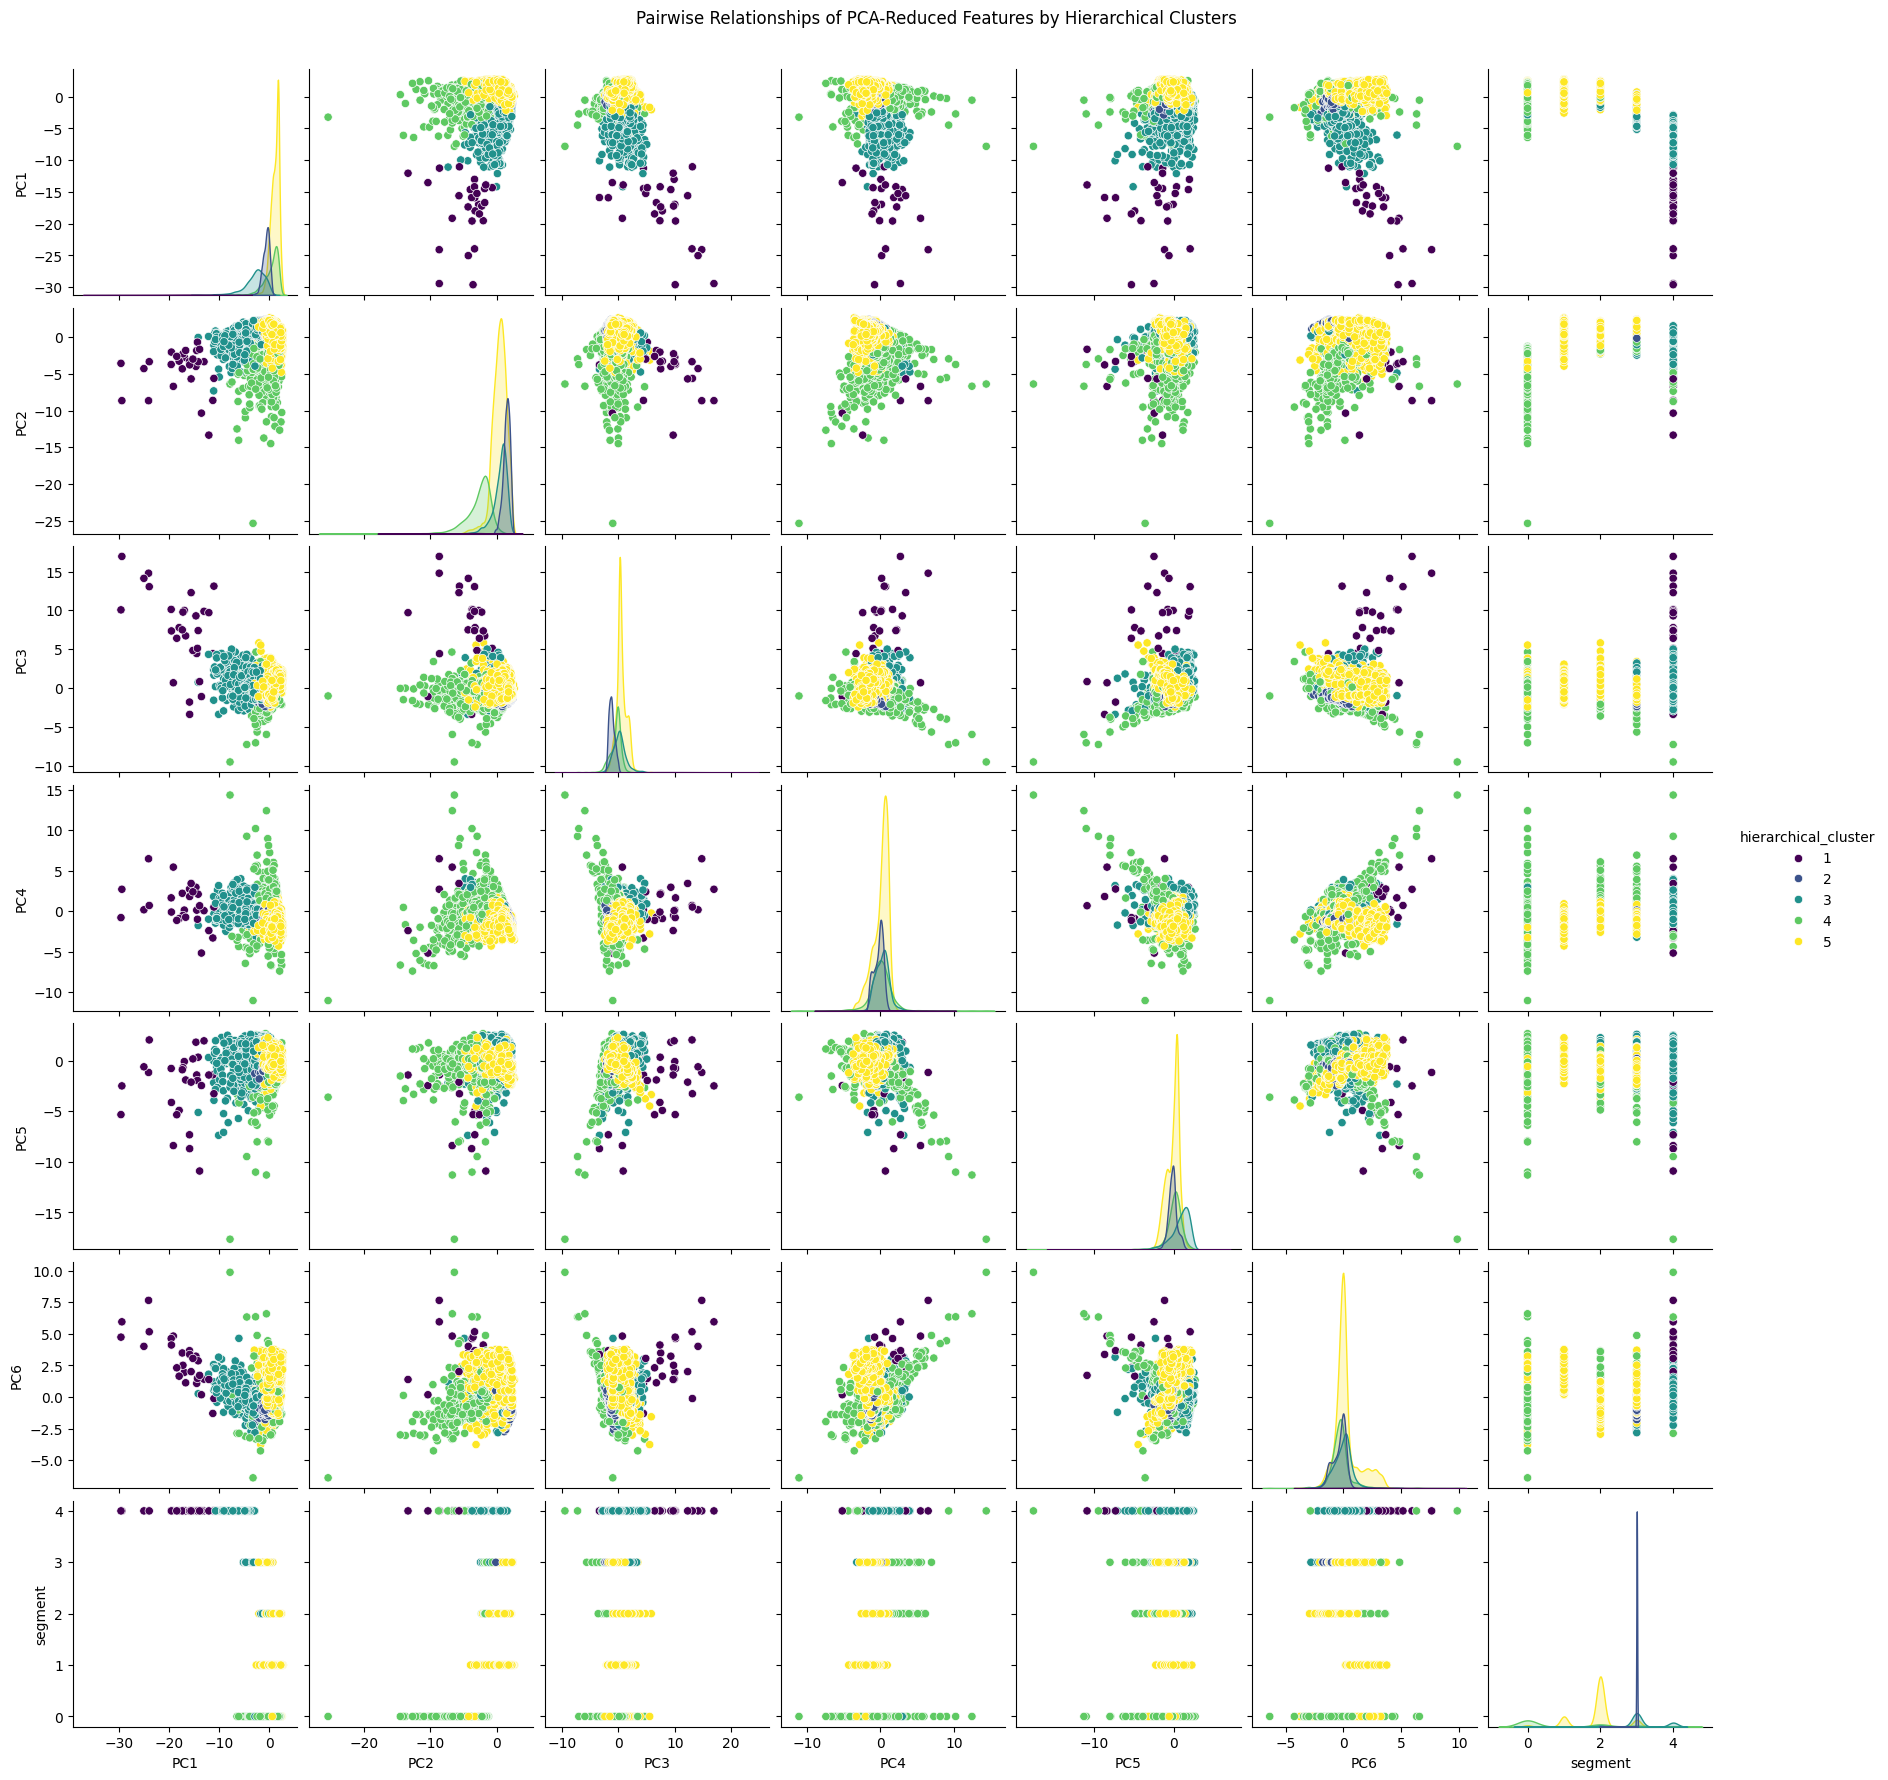

In [127]:
# Choose threshold and assign clusters

# Assign cluster labels to PCA DataFrame

clusters = fcluster(linkage_matrix, t=5, criterion='maxclust')

df_pca['hierarchical_cluster'] = clusters
sns.pairplot(df_pca, hue='hierarchical_cluster', palette='viridis', diag_kind='kde')
plt.suptitle("Pairwise Relationships of PCA-Reduced Features by Hierarchical Clusters", y=1.02)
plt.show()